

## Russian License Plate Blurring


----


* Just go for it! Use the image under the DATA folder called car_plate.jpg and create a function that will blur the image of its license plate. Check out the Haar Cascades folder for the correct pre-trained .xml file to use.
* Use this notebook! Here we offer a guide of what main steps you should take to complete the project.
* Jump to the solutions notebook and video to treat this entire project as code-along project where you can code along with us.



### Import the usual libraries you think you'll need.**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read in the car_plate.jpg file from the DATA folder.**

In [2]:
img = cv2.imread("C:/Users/bobby/Downloads/Computer-Vision-with-Python/DATA/car_plate.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

### Create a function that displays the image in a larger scale and correct coloring for matplotlib.**

In [3]:
def display(img):
    
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    
   

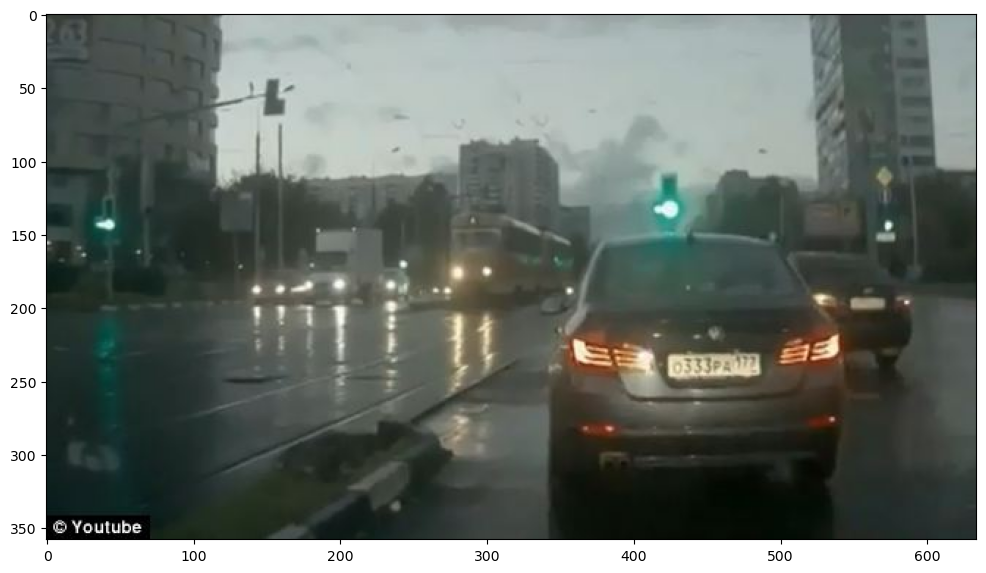

In [4]:
display(img)

### Load the haarcascade_russian_plate_number.xml file.**

In [5]:
plate_cascade = cv2.CascadeClassifier("C:/Users/bobby/Downloads/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_russian_plate_number.xml")

### Create a function that takes in an image and draws a rectangle around what it detects to be a license plate. Keep in mind we're just drawing a rectangle around it for now, later on we'll adjust this function to blur. You may want to play with the scaleFactor and minNeighbor numbers to get good results.**

In [6]:
def detect_plate(img):
    
    new_img = img.copy()
    
    plate_reacts = plate_cascade.detectMultiScale(img,scaleFactor=1.2,minNeighbors=3)
    
    for (x,y,w,h) in plate_reacts:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    
    return img
    
    

In [7]:
result = detect_plate(img)

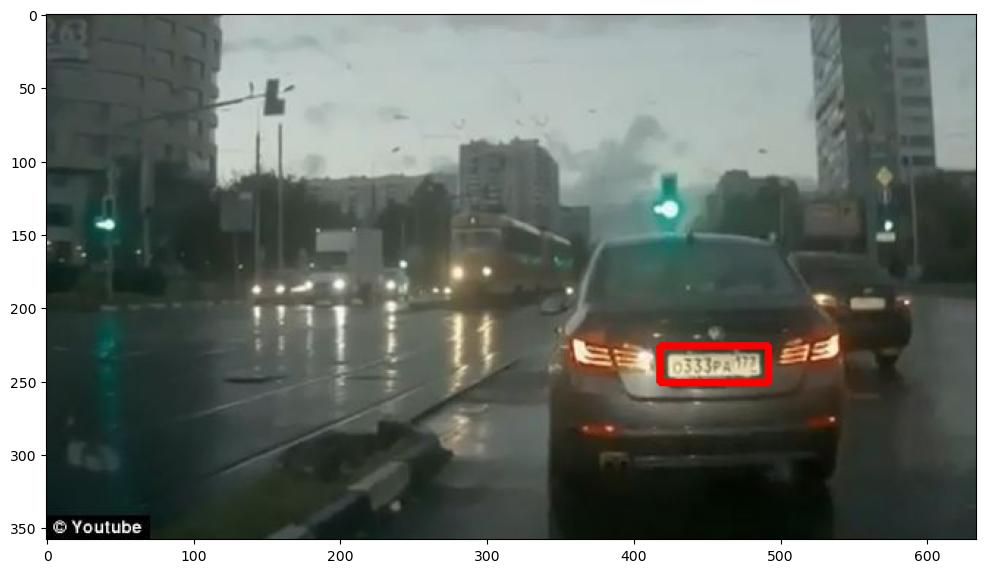

In [8]:
display(result)

In [9]:
img = cv2.imread("C:/Users/bobby/Downloads/Computer-Vision-with-Python/DATA/car_plate.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

### Edit the function so that is effectively blurs the detected plate, instead of just drawing a rectangle around it. Here are the steps you might want to take:**

1. The hardest part is converting the (x,y,w,h) information into the dimension values you need to grab an ROI (somethign we covered in the lecture 01-Blending-and-Pasting-Images. It's simply [Numpy Slicing](https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python), you just need to convert the information about the top left corner of the rectangle and width and height, into indexing position values.
2. Once you've grabbed the ROI using the (x,y,w,h) values returned, you'll want to blur that ROI. You can use cv2.medianBlur for this.
3. Now that you have a blurred version of the ROI (the license plate) you will want to paste this blurred image back on to the original image at the same original location. Simply using Numpy indexing and slicing to reassign that area of the original image to the blurred roi.

In [10]:
def detect_and_blur_plate(img):
    
    # Watch solutions video for line by line explanation!
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = img[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [11]:
result = detect_and_blur_plate(img)

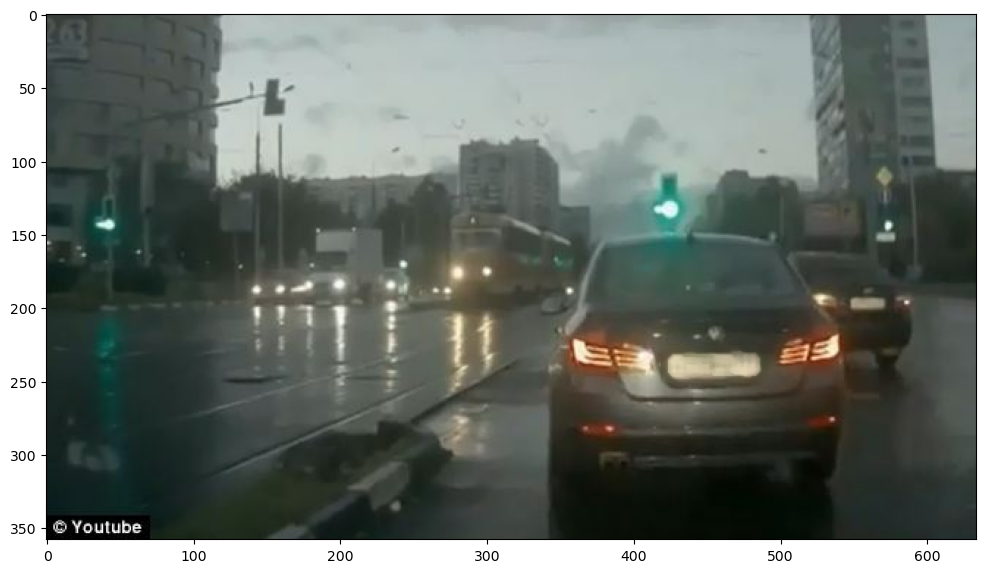

In [12]:
display(result)